**Ev fiyatları modeli**

-Bu alıştırmada, modelinizi kullanarak konut fiyatlarını tahmin edeceksiniz.Bu ödevi tamamlamak için, aşağıdaki görevlerin çözümlerini içeren bir Jupyter not defterini link olarak gönderin.Kafanıza takılan konuları mentörünüzle konuşabilir ya da ofis saatinde Slack üzerinden sorabilirsiniz<br>  
Ev Fiyatları verilerini Kaggle'dan indirin<br>  
Verilerinizi eğitim ve test kümelerine ayırın<br>  
Modelinizi eğitim kümesinden önceki derste olduğu gibi oluşturun. Modelinizin uygunluğunu değerlendirin<br>  
Test kümesindeki ev fiyatlarını tahmin edin ve bu derste belirttiğimiz metrikleri kullanarak modelinizin performansını değerlendirin<br>  
Modelinizin performansı tatmin edici mi? Açıklayın<br>  
Bazı değişkenleri ekleyerek veya çıkararak modelinizi tahmin performansı açısından geliştirmeye çalışın.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
data = pd.read_csv('C:\\Users\\Pc\\Desktop\\train.csv')
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.000,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.000,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,nan,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.000,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.000,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
df=data.loc[:, ['Street','OverallQual', 'YearBuilt', 'ExterQual', 'GrLivArea', 'SalePrice']]
df.head()

,Street,OverallQual,YearBuilt,ExterQual,GrLivArea,SalePrice
0,Pave,7,2003,Gd,1710,208500
1,Pave,6,1976,TA,1262,181500
2,Pave,7,2001,Gd,1786,223500
3,Pave,7,1915,TA,1717,140000
4,Pave,8,2000,Gd,2198,250000


In [4]:
df["Str"] = pd.get_dummies(df.Street, drop_first=True)
df["Ext"] = df.ExterQual.replace({'Gd':1, "TA":0, "Ex":2, "Fa":3})

In [5]:
Y=df['SalePrice']
X=df[['Str', 'OverallQual', 'YearBuilt', 'Ext','GrLivArea']]

Verileri eğitim ve test kümelerine ayırıyoruz

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 1168
Test kümesindeki gözlem sayısı   : 292


**Model Tahmini**

In [7]:
X_train = sm.add_constant(X_train)

sonuclar = sm.OLS(y_train, X_train).fit()

sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     689.0
Date:                Sat, 13 Apr 2019   Prob (F-statistic):               0.00
Time:                        11:43:59   Log-Likelihood:                -14008.
No. Observations:                1168   AIC:                         2.803e+04
Df Residuals:                    1162   BIC:                         2.806e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -8.896e+05   9.48e+04     -9.381      0.000   -1.08e+06   -7.04e+05
Str         -6688.2491   1.78e+04     -0.376      0.707   -4.16e+04    2.82e+04
OverallQual  2.255e+04   1344.213     16.774      0.000    1.99e+04    2.52e+04
YearBuilt     427.6985     48.907      8.745      0.000     331.742     523.655
Ext          1.437e+04   2416.894      5.948      0.000    9632.745    1.91e+04
GrLivArea      59.0355      2.791     21.149      0.000      53.559      64.512
==============================================================================
Omnibus:                      281.572   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14102.270
Skew:                          -0.023   Prob(JB):                         0.00
Kurtosis:                      20.023   Cond. No.                     2.08e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

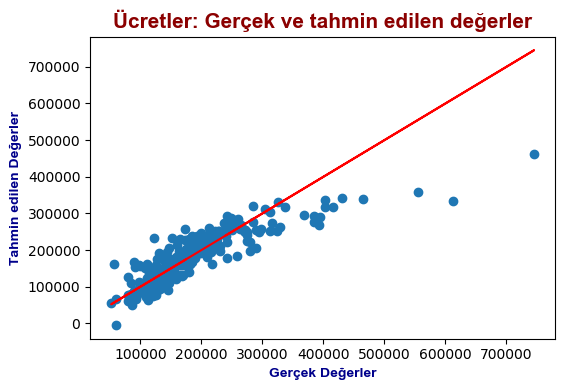

Ortalama Mutlak Hata (MAE)        : 29053.42663340848
Ortalama Kare Hata (MSE)          : 1921888682.8426397
Kök Ortalama Kare Hata (RMSE)     : 43839.350848782415
Ortalama Mutlak Yüzde Hata (MAPE) : 16.520960993096832


In [8]:
X_test = sm.add_constant(X_test)

y_preds = sonuclar.predict(X_test)


baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(dpi = 100)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Ücretler: Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

**Model Tahmini (Street değişkeni çıkarıldı)**

In [10]:
X2=df[[ 'OverallQual', 'YearBuilt', 'Ext','GrLivArea']]

In [11]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y, test_size = 0.2, random_state = 465)

print('Eğitim gözlem:', X2_train.shape[0])
print('Test gözlem:', X2_test.shape[0])

Eğitim gözlem: 1168
Test gözlem: 292


In [12]:
X2_train = sm.add_constant(X2_train)

results2 = sm.OLS(y_train, X2_train).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     861.9
Date:                Sat, 13 Apr 2019   Prob (F-statistic):               0.00
Time:                        11:44:40   Log-Likelihood:                -14008.
No. Observations:                1168   AIC:                         2.803e+04
Df Residuals:                    1163   BIC:                         2.805e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -8.954e+05   9.35e+04     -9.573      0.000   -1.08e+06   -7.12e+05
OverallQual   2.25e+04   1338.374     16.813      0.000    1.99e+04    2.51e+04
YearBuilt     427.3892     48.882      8.743      0.000     331.482     523.297
Ext          1.451e+04   2390.408      6.069      0.000    9816.493    1.92e+04
GrLivArea      59.0155      2.790     21.154      0.000      53.542      64.489
==============================================================================
Omnibus:                      281.520   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14092.817
Skew:                          -0.022   Prob(JB):                         0.00
Kurtosis:                      20.017   Cond. No.                     2.05e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

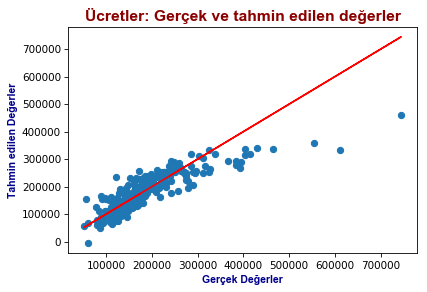

Ortalama Mutlak Hata (MSE)        : 29028.99484873093
Ortalama Kare Hata (MSE)          : 1917138126.8973188
Kök Ortalama Kare Hata (RMSE)     : 43785.135912742335
Ortalama Mutlak Yüzde Hata (MAPE) : 16.48050302550425


In [13]:
X2_test = sm.add_constant(X2_test)

y2_preds = results2.predict(X2_test)

plt.figure(dpi = 75)
plt.scatter(y2_test, y2_preds)
plt.plot(y2_test, y2_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Ücretler: Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

print("Ortalama Mutlak Hata (MSE)        : {}".format(mean_absolute_error(y2_test, y2_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y2_test, y2_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y2_test, y2_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y2_test - y2_preds) / y2_test)) * 100))

İkinci modelde istatistiksel olarak anlamsız olan Street değişkenini çıkardık ayarlanmış R kare değeri değeri değişmedi. Sadece BIC değerinde düşüş vardır ve ikinci modelde katsayıların hepsi anlamlıdır.

Modele SalePrice ile ilişkisinin yüksek olduğu değişkenler eklendi.

In [14]:
df1=data.loc[:, ['OverallQual', 'YearBuilt', 'ExterQual', 'GrLivArea', 'YearRemodAdd', '1stFlrSF', 'BsmtFinSF1' ,'SalePrice']]
df1.head(10)

,OverallQual,YearBuilt,ExterQual,GrLivArea,YearRemodAdd,1stFlrSF,BsmtFinSF1,SalePrice
0,7,2003,Gd,1710,2003,856,706,208500
1,6,1976,TA,1262,1976,1262,978,181500
2,7,2001,Gd,1786,2002,920,486,223500
3,7,1915,TA,1717,1970,961,216,140000
4,8,2000,Gd,2198,2000,1145,655,250000
5,5,1993,TA,1362,1995,796,732,143000
6,8,2004,Gd,1694,2005,1694,1369,307000
7,7,1973,TA,2090,1973,1107,859,200000
8,7,1931,TA,1774,1950,1022,0,129900
9,5,1939,TA,1077,1950,1077,851,118000


In [20]:
df1 = df1.dropna()

In [21]:
df1["Ext"] = df.ExterQual.replace({'Gd':1, "TA":0, "Ex":2, "Fa":3})

In [22]:
X3=df1[['OverallQual', 'YearBuilt', 'Ext', 'GrLivArea', 'YearRemodAdd', '1stFlrSF', 'BsmtFinSF1']]
Y3=df1[['SalePrice']]

In [23]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, Y3, test_size = 0.2, random_state = 465)
X3_train = sm.add_constant(X3_train)
results3 = sm.OLS(y3_train, X3_train).fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     559.5
Date:                Sat, 13 Apr 2019   Prob (F-statistic):               0.00
Time:                        11:49:42   Log-Likelihood:                -13951.
No. Observations:                1168   AIC:                         2.792e+04
Df Residuals:                    1160   BIC:                         2.796e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -1.04e+06   1.36e+05     -7.637      0.000   -1.31e+06   -7.73e+05
OverallQual   2.108e+04   1311.733     16.067      0.000    1.85e+04    2.36e+04
YearBuilt      284.0701     50.978      5.572      0.000     184.051     384.089
Ext           1.406e+04   2302.573      6.107      0.000    9545.118    1.86e+04
GrLivArea       48.9290      2.930     16.700      0.000      43.181      54.677
YearRemodAdd   211.6169     70.985      2.981      0.003      72.343     350.891
1stFlrSF        20.4138      3.839      5.318      0.000      12.882      27.946
BsmtFinSF1      17.9455      2.704      6.636      0.000      12.640      23.251
==============================================================================
Omnibus:                      655.816   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            83018.060
Skew:                          -1.590   Prob(JB):                         0.00
Kurtosis:                      44.179   Cond. No.                     4.28e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

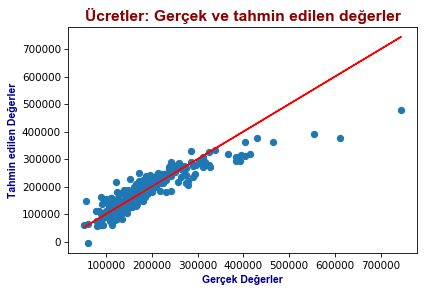

Ortalama Mutlak Hata (MSE)        : 24912.074117618813


In [38]:
X3_test = sm.add_constant(X3_test)

y3_preds = results3.predict(X3_test)

plt.figure(dpi = 75)
plt.scatter(y3_test, y3_preds)
plt.plot(y3_test, y3_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Ücretler: Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

print("Ortalama Mutlak Hata (MSE)        : {}".format(mean_absolute_error(y3_test, y3_preds)))

Modelleri karşılaştırdığımızda ayarlanmış R kare değerleri için 0.77 ile en son model daha iyidir<br> En son modelde bütün katsayılar anlamlıdır<br>Ortalama hatalar için de son modelde daha düşük çıkmıştır<br>Modeli iyileştirmek için aykırı değerlerden kurtulması etkili olabilir<br>Regresyon varsayımları uygulanarak model iyileştirilebilir.